In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.layers import InputLayer,Conv2D,ReLU,GlobalAveragePooling1D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

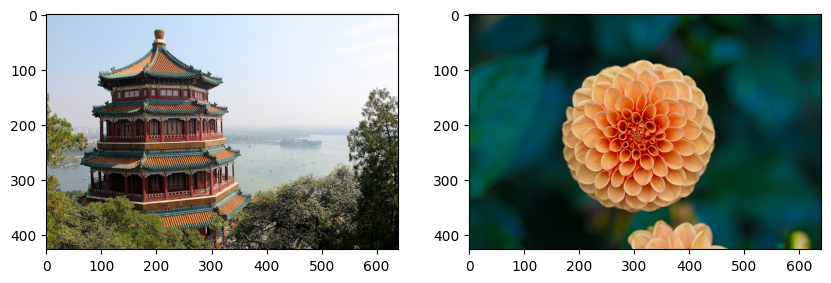

((427, 640, 3), (427, 640, 3))

In [ ]:
china=datasets.load_sample_image('china.jpg')
flower=datasets.load_sample_image('flower.jpg')

china=china/255
flower=flower/255

fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(china)
ax[1].imshow(flower)
plt.show()
china.shape,flower.shape

In [ ]:
images=np.array([china,flower])
batch_size,height,width,channels=images.shape
batch_size,height,width,channels

(2, 427, 640, 3)

In [ ]:
filters=np.zeros(shape=(7,7,channels,2),dtype=np.float32)
filters[:,3,:,0]=1
filters[3,:,:,1]=1
filters.shape

(7, 7, 3, 2)

In [ ]:
filters?

In [ ]:
outputs=tf.nn.conv2d(images,filters,strides=1,padding='SAME')

1st feature map through verticle filter


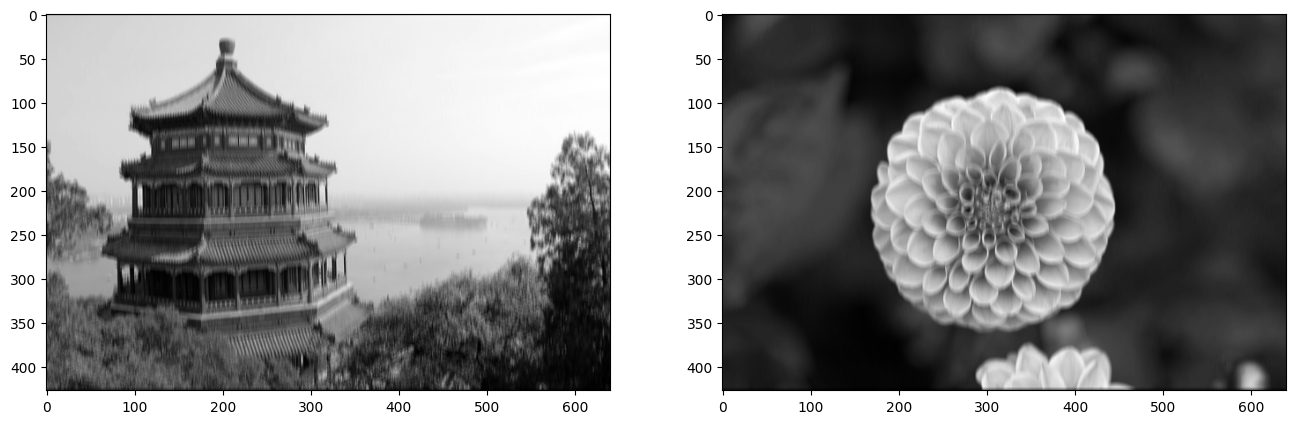

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(outputs[0,:,:,0],cmap='gray')
ax[1].imshow(outputs[1,:,:,0],cmap='gray')
print('1st feature map through verticle filter')
plt.show()

2st feature map through verticle filter


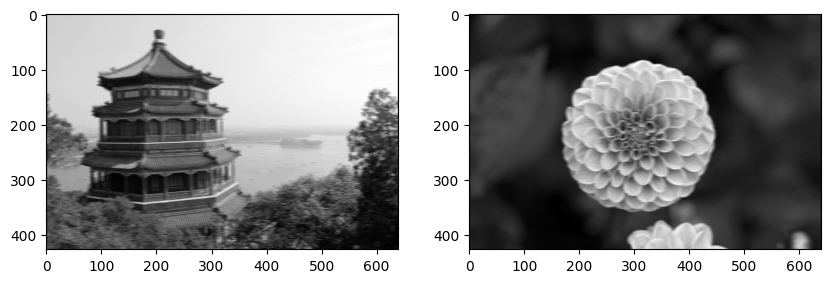

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(outputs[0,:,:,1],cmap='gray')
ax[1].imshow(outputs[1,:,:,1],cmap='gray')
print('2st feature map through verticle filter')
plt.show()

In [ ]:
max_pool=keras.layers.MaxPool2D(pool_size=2,padding='valid',dtype='float64')(images)

Image before and after pooling operation:


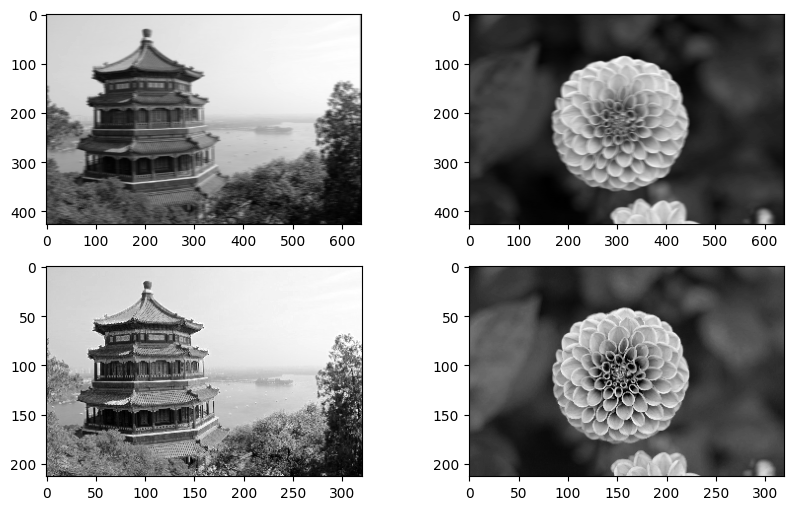

In [ ]:

fig,ax=plt.subplots(2,2,figsize=(10,6))

ax[0][0].imshow(outputs[0,:,:,1],cmap='gray')
ax[0][1].imshow(outputs[1,:,:,1],cmap='gray')

ax[1][0].imshow(max_pool[0,:,:,1],cmap='gray')
ax[1][1].imshow(max_pool[1,:,:,1],cmap='gray')

print('Image before and after pooling operation:')
plt.show()

In [ ]:
original_bytes=images.nbytes
pooling_bytes=np.array(max_pool).nbytes
ratio=pooling_bytes/original_bytes
print('Yhe compression ratio between the original image size and the total size after pooling is : ',ratio)

Yhe compression ratio between the original image size and the total size after pooling is :  0.24941451990632318


In [ ]:
import pandas as pd
df_train=pd.read_csv('/content/FordA_TRAIN.tsv',delimiter='\t',header=None)
df_test=pd.read_csv('/content/FordA_TEST.tsv',delimiter='\t',header=None)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.140402,0.171641,0.302044,0.232804,0.033853,-0.224183,-0.469987,-0.645396,-0.617700,...,-0.319966,0.390903,0.974831,1.258717,1.143316,0.647092,-0.049582,-0.690402,-0.976596,-0.794263
1,-1,0.334038,0.322253,0.453844,0.671852,0.887897,1.020469,1.059750,1.030290,0.950746,...,0.435186,-0.346502,-0.924912,-1.208716,-1.247996,-1.139974,-1.041772,-1.041772,-1.159614,-1.375659
2,-1,0.716686,0.744367,0.725913,0.661325,0.555217,0.413585,0.246580,0.065273,-0.121109,...,3.171020,2.276019,1.219548,0.081881,-1.050250,-2.092881,-2.983269,-3.675281,-4.136622,-4.339612
3,1,1.240282,1.331189,1.386596,1.383220,1.305979,1.142784,0.878613,0.532291,0.140025,...,-0.820262,-1.124551,-1.302012,-1.340564,-1.271440,-1.146352,-1.011328,-0.931222,-0.934498,-1.001288
4,-1,-1.159478,-1.204174,-1.167605,-1.033518,-0.818166,-0.558119,-0.299291,-0.093691,0.022770,...,0.660853,0.441438,0.206176,-0.006941,-0.146919,-0.183082,-0.112382,0.008987,0.131413,0.186266


In [ ]:
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
496    0
497    0
498    0
499    0
500    0
Length: 501, dtype: int64

In [ ]:
x_train=df_train.iloc[:,1:].values
y_train=df_train.iloc[:,0].astype(int)
x_test=df_test.iloc[:,1:].values
y_test=df_test.iloc[:,0].astype(int)
x_train.shape,x_test.shape

((3601, 500), (1320, 500))

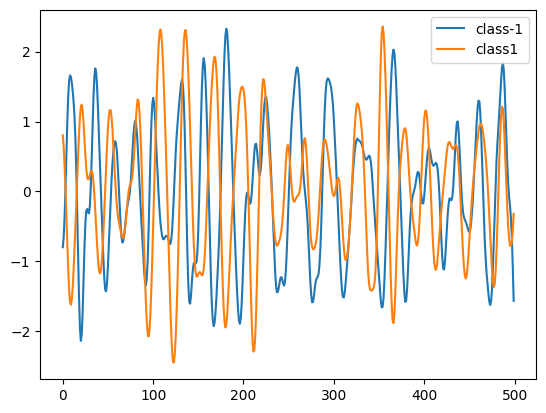

In [ ]:
classes=np.unique(np.concatenate((y_train,y_test),axis=0))
for c in classes:
  c_x_train=x_train[y_train==c]
  plt.plot(c_x_train[0],label='class'+str(c))
plt.legend(loc='best')
plt.show()


In [ ]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],1))
x_train.shape,x_train.shape

((3601, 500, 1), (3601, 500, 1))

In [ ]:
idx=np.random.permutation(len(x_train))
x_train=x_train[idx]
y_train=y_train[idx]

In [ ]:
y_train[y_train==-1]=0
y_test[y_test==-1]=0

In [ ]:
model=Sequential([InputLayer(x_train.shape[1:]),
                  Conv1D(filters=64,kernel_size=3,padding='same'),
                  BatchNormalization(),
                  ReLU(),
                  Conv1D(filters=64,kernel_size=3,padding='same'),
                  BatchNormalization(),
                  ReLU(),
                  Conv1D(filters=64,kernel_size=3,padding='same'),
                  BatchNormalization(),
                  ReLU(),
                  GlobalAveragePooling1D(),
                  Dense(2,activation='softmax')
                  ])

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 64)           256       
                                                                 
 batch_normalization (BatchN  (None, 500, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 500, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 500, 64)          256       
 hNormalization)                                                 
                                                                 
 re_lu_1 (ReLU)              (None, 500, 64)           0

In [ ]:
callbacks=[keras.callbacks.ModelCheckpoint('best_model.h5',save_best_only=True,monitor='val_loss')]
history=model.fit(x_train,y_train,batch_size=32,epochs=10,callbacks=callbacks,validation_split=0.2)

Epoch 1/10
90/90 [==============================] - 16s 173ms/step - loss: 0.3147 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.3344 - val_sparse_categorical_accuracy: 0.8058
Epoch 2/10
90/90 [==============================] - 19s 214ms/step - loss: 0.3292 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.7949 - val_sparse_categorical_accuracy: 0.5978
Epoch 3/10
90/90 [==============================] - 22s 249ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8809 - val_loss: 1.0769 - val_sparse_categorical_accuracy: 0.5104
Epoch 4/10
90/90 [==============================] - 20s 225ms/step - loss: 0.2952 - sparse_categorical_accuracy: 0.8819 - val_loss: 0.3594 - val_sparse_categorical_accuracy: 0.7906
Epoch 5/10
90/90 [==============================] - 19s 205ms/step - loss: 0.2968 - sparse_categorical_accuracy: 0.8743 - val_loss: 0.3098 - val_sparse_categorical_accuracy: 0.8627
Epoch 6/10
90/90 [==============================] - 20s 222ms/step - loss: 0.2837 - sparse_cate

In [ ]:
model=keras.models.load_model('best_model.h5')
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test loss',test_loss)
print('Test accuracy',test_acc)

42/42 [==============================] - 1s 26ms/step - loss: 0.3562 - sparse_categorical_accuracy: 0.8114
Test loss 0.3562455177307129
Test accuracy 0.8113636374473572


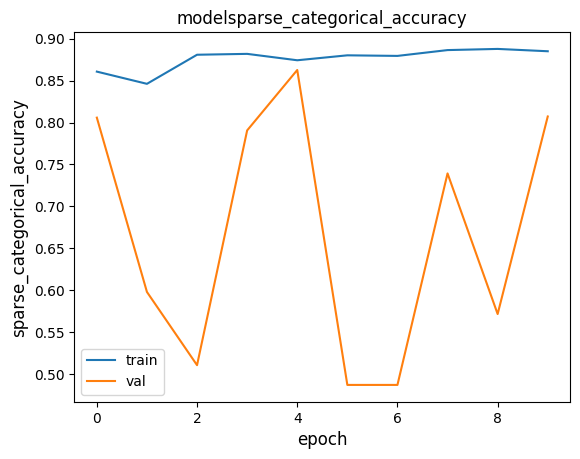

In [ ]:
metric="sparse_categorical_accuracy"
plt.plot(history.history[metric])
plt.plot(history.history['val_'+metric])

plt.title('model'+metric)
plt.ylabel(metric,fontsize='large')
plt.xlabel('epoch',fontsize='large')
plt.legend(['train','val'],loc='best')
plt.show()

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()

Label :  9


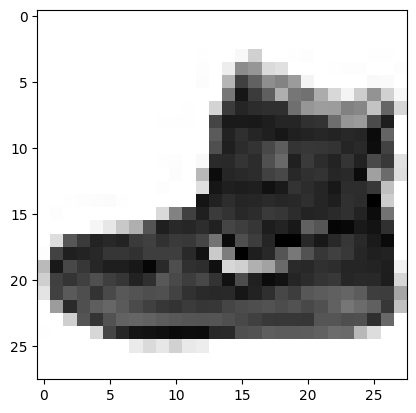

In [ ]:
print('Label : ',y_train_full[0])
plt.imshow(x_train_full[0],cmap='Greys')
plt.show()

In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
x_train_full.shape,x_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=123)
x_train.shape,x_val.shape

((48000, 28, 28), (12000, 28, 28))

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
x_val=x_val.reshape(x_val.shape[0],28,28,1)
x_train.shape,x_val.shape,x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
model=Sequential([Conv2D(64,7,activation='relu',padding='same',input_shape=[28,28,1]),
                 MaxPooling2D(2),
                 Conv2D(128,3,activation='relu',padding='same'),
                 Conv2D(128,3,activation='relu',padding='same'),
                 MaxPooling2D(2),
                 Conv2D(256,3,activation='relu',padding='same'),
                 Conv2D(256,3,activation='relu',padding='same'),
                 MaxPooling2D(2),
                 Flatten(),
                 Dense(128,activation='relu'),
                 Dropout(0.5),
                 Dense(64,activation='relu'),
                 Dropout(0.5),
                 Dense(10,activation='softmax')])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [ ]:
callbacks=[keras.callbacks.ModelCheckpoint('best_model.h5',save_best_only=True,monitor='val_loss')]
history=model.fit(x_train,y_train,batch_size=32,epochs=10,callbacks=callbacks,validation_split=0.2)

Epoch 1/10


In [ ]:
model=keras.models.load_model('best_model.h5')
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test loss',test_loss)
print('Test accuracy',test_acc)

In [ ]:
batch_size=256

gen=ImageDataGenerator(rescale=1.0/255,
                       width_shift_range=0.005,
                       height_shift_range=0.005,
                       rotation_range=0,
                       horizontal_flip=True)

train_batches=gen.flow(x_train,y_train,batch_size=batch_size)
val_batches=gen.flow(x_val,y_val,batch_size=batch_size)

NameError: ignored

In [ ]:
# Train the model
history = model. fit(train_batches,
steps_per_epoch = x_train.shape[0]//batch_size,
epochs = 50,
validation_data = val_batches,
validation_steps = x_val.shape[0]//batch_size)

Epoch 1/50
187/187 [==============================] - 29s 126ms/step - loss: 1.1762 - accuracy: 0.5786 - val_loss: 0.5543 - val_accuracy: 0.7891
Epoch 2/50
187/187 [==============================] - 22s 118ms/step - loss: 0.6048 - accuracy: 0.7837 - val_loss: 0.3872 - val_accuracy: 0.8537
Epoch 3/50
187/187 [==============================] - 23s 125ms/step - loss: 0.4770 - accuracy: 0.8368 - val_loss: 0.3518 - val_accuracy: 0.8711
Epoch 4/50
187/187 [==============================] - 24s 130ms/step - loss: 0.4172 - accuracy: 0.8554 - val_loss: 0.3171 - val_accuracy: 0.8838
Epoch 5/50
187/187 [==============================] - 23s 124ms/step - loss: 0.3764 - accuracy: 0.8710 - val_loss: 0.3043 - val_accuracy: 0.8911
Epoch 6/50
187/187 [==============================] - 23s 123ms/step - loss: 0.3483 - accuracy: 0.8831 - val_loss: 0.2845 - val_accuracy: 0.8974
Epoch 7/50
187/187 [==============================] - 22s 117ms/step - loss: 0.3252 - accuracy: 0.8902 - val_loss: 0.2706 - val_ac

In [ ]:
# Instantiate ImageDataGenerator
test_gen = ImageDataGenerator (rescale=1.0/255)
# Generate batches of tensor image data
test_batches = test_gen.flow(x_test, y_test, batch_size= 50)
# Evaluate Model against test data and get the score
score =model.evaluate(test_batches)
# Print Metrics
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: ignored

In [ ]:
X_new=x_test[-3:]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 368ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.93, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.18, 0.81, 0.  , 0.  ]],
      dtype=float32)

In [ ]:
class_names=['T-shirt/top',"Trouser",'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','ankle boot']

In [ ]:
y_pred=np.argmax(model.predict(X_new),axis=-1)
print('Predicted labels:\n',y_pred)
print(np.array(class_names)[y_pred])

1/1 [==============================] - 0s 18ms/step
Predicted labels:
 [7 7 7]
['Sneaker' 'Sneaker' 'Sneaker']


In [ ]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 17s 0us/step


In [ ]:
class_names=['airplane','automobiles','vird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
val_images,val_labels=train_images[:5000],train_labels[:5000]
train_images,train_labels=train_images[5000:10000],train_labels[5000:10000]

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
val_ds=tf.data.Dataset.from_tensor_slices((val_images,val_labels))

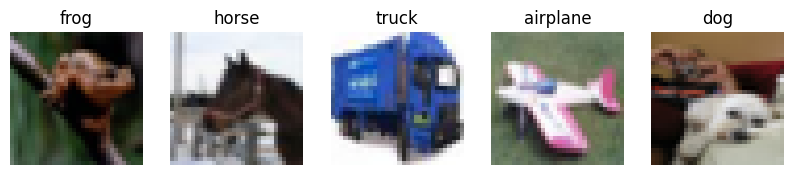

In [ ]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_ds.take(5)):
  ax=plt.subplot(5,5,i+1)
  plt.imshow(image)
  plt.title(class_names[label.numpy()[0]])
  plt.axis('off')

In [ ]:
def process_images (image, label):
  ''' Normalize images to have a mean of 0 and standard deviation of 1,
  resize images from 32x32 to 227×227 '''
  image = tf.image.per_image_standardization (image)
  image = tf.image.resize(image, (227,227))
  return image, label

In [ ]:
train_ds_size=len(train_ds)
test_ds_size=len(test_ds)
val_ds_size=len(val_ds)
print('Training data size:' ,train_ds_size)
print('Test data size:' ,test_ds_size)
print('validation data size:' ,val_ds_size)

Training data size: 5000
Test data size: 10000
validation data size: 5000


In [ ]:
train_ds=(train_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
test_ds=(test_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))
val_ds=(val_ds.map(process_images).shuffle(buffer_size=train_ds_size).batch(batch_size=32,drop_remainder=True))

In [ ]:
model = Sequential([
                    Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),activation="relu",input_shape=(227,227,3)),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3),strides=(2,2)),
                    Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3),strides=(2,2)),
                    Conv2D(filters=384,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=384,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"),
                    BatchNormalization(),
                    Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"),
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(3,3),strides=(2,2)),
                    Flatten(),
                    Dense(4096,activation="relu"),
                    Dropout(0.5),
                    Dense(4096,activation="relu"),
                    Dropout(0.5),
                    Dense(10,activation="softmax")
                    ])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=tf.optimizers.SGD(learning_rate=0.001),metrics=["accuracy"])
model.summary()

NameError: ignored

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

NameError: ignored

In [ ]:
model.evaluate(test_ds)

In [ ]:
model=keras.applications.resnet50.ResNet50(weights='imagenet');

102967424/102967424 [==============================] - 0s 0us/step


NameError: ignored

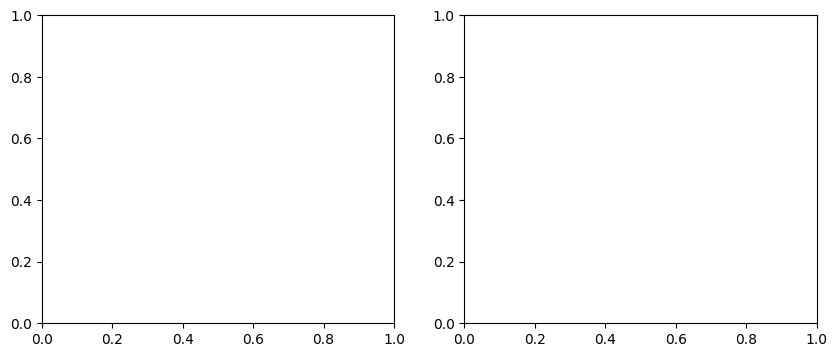

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
ax[0].imshow(images[0])
ax[1].imshow(images[1])
print("Images before reshape")
plt.show()